<h1>Group:</h1>
<ul>
    <li>
        Student # 1:</br>
        <ul>
            <li>
            <b>Full Name:</b> LAURENT Sacha
            </li>
            <li>
            <b>Student ID:</b> 20220702
            </li>
        </ul>
    </li>
    <li>
        Student # 2:</br>
        <ul>
            <li>
            <b>Full Name:</b> SIMON Eliot
            </li>
            <li>
            <b>Student ID:</b>
            </li>
        </ul>
    </li>
</ul>

</b><hr>

<h1>Step 1: Dataset Selection</h1>
<b>World Happiness Report</b> <br/>
Happiness scored according to economic production, social support, etc. <br/>
<a href="https://www.kaggle.com/datasets/unsdsn/world-happiness"> Dataset link on Kaggle </a>

</b><hr>

<h1>Step 2: Scenario/About Dataset:</h1>
This dataset contains global data on happiness scores and factors that contribute to happiness, such as GDP per capita, social support, and life expectancy.
Many Machine Learning alogrithms could be performed on this dataset:
<ul>
    <li><b>Linear Regression:</b> Use regression to predict happiness scores based on economic and social factors.</li>
    <li><b>Clustering:</b> Group countries with similar happiness profiles or socioeconomic factors, identifying regional similarities or global trends</li>
    <li><b>Classification:</b> </li>
</ul>

</b><hr>

<h1>Step 3: Data Loading:</h1>

In [253]:
import pandas as pd

#%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

<h1>Read csv</h1>

In [254]:
D = pd.read_csv("World_Happiness_Report.csv", header=0)   # or header=0
D

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [255]:
#dummy_variable = pd.get_dummies(D["Region"])   # creates new columns with all possible strings values in the og column and a True/False value for each line
#D = pd.concat([D, dummy_variable], axis=1)     # MERGE 2 DICTS
#D = D.drop(["Region"], axis=1)
#D

</b><hr>

<h1>Step 4: Data Wrangling or Data Pre-processing</h1>

In [256]:
# count the number of missing values in each column
print("missing values for each column:")
for col in D.columns:
    print("-", col+":", D[col].isnull().sum())

missing values for each column:
- Country: 0
- Region: 0
- Happiness Rank: 0
- Happiness Score: 0
- Lower Confidence Interval: 0
- Upper Confidence Interval: 0
- Economy (GDP per Capita): 0
- Family: 0
- Health (Life Expectancy): 0
- Freedom: 0
- Trust (Government Corruption): 0
- Generosity: 0
- Dystopia Residual: 0


We can see that many values are missing

</b><hr>

<h1>Step 5: Exploratory Data Analysis:</h1>

Text(0.5, 0, 'Economy (GDP per Capita)')

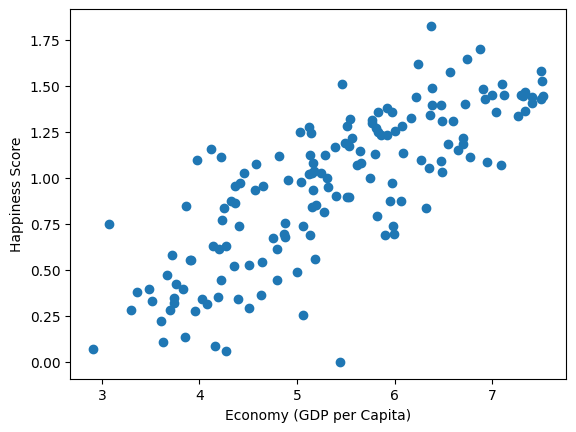

In [257]:
plt.pyplot.scatter(D["Happiness Score"], D["Economy (GDP per Capita)"])
plt.pyplot.ylabel("Happiness Score")
plt.pyplot.xlabel("Economy (GDP per Capita)")

Text(0.5, 0, 'Health (Life Expectancy)')

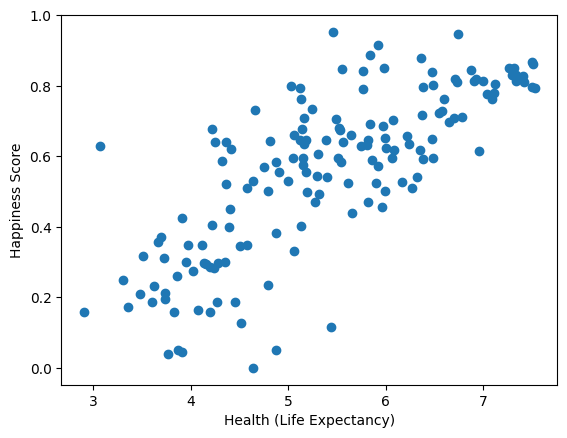

In [258]:
plt.pyplot.scatter(D["Happiness Score"], D["Health (Life Expectancy)"])
plt.pyplot.ylabel("Happiness Score")
plt.pyplot.xlabel("Health (Life Expectancy)")

Text(0.5, 0, 'Health (Life Expectancy)')

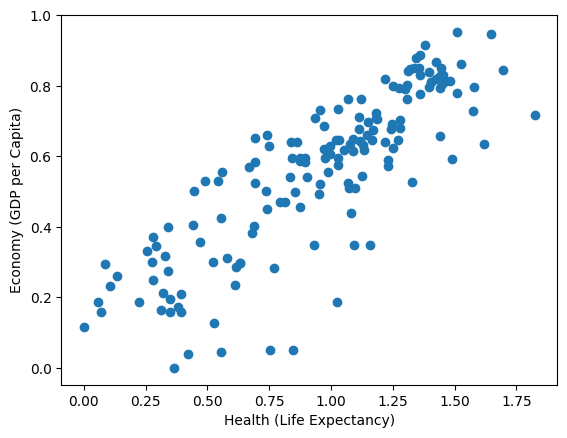

In [259]:
plt.pyplot.scatter(D["Economy (GDP per Capita)"], D["Health (Life Expectancy)"])
plt.pyplot.ylabel("Economy (GDP per Capita)")
plt.pyplot.xlabel("Health (Life Expectancy)")

Text(0.5, 1.0, 'Happiness Score in function of Economy (GDP per Capita)')

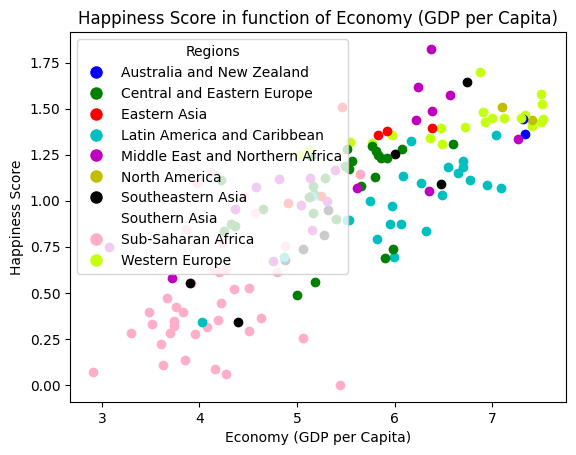

In [260]:
independant_var = "Economy (GDP per Capita)"
y = range(0,9)
for i, region in enumerate(D["Region"]):
    if   region == "Australia and New Zealand": plt.pyplot.plot(D["Happiness Score"][i], D[independant_var][i], color='b', marker='o')
    elif region == "Central and Eastern Europe": plt.pyplot.plot(D["Happiness Score"][i], D[independant_var][i], color='g', marker='o')
    elif region == "Eastern Asia": plt.pyplot.plot(D["Happiness Score"][i], D[independant_var][i], color='r', marker='o')
    elif region == "Latin America and Caribbean": plt.pyplot.plot(D["Happiness Score"][i], D[independant_var][i], color='c', marker='o')
    elif region == "Middle East and Northern Africa": plt.pyplot.plot(D["Happiness Score"][i], D[independant_var][i], color='m', marker='o')
    elif region == "North America": plt.pyplot.plot(D["Happiness Score"][i], D[independant_var][i], color='y', marker='o')
    elif region == "Southeastern Asia": plt.pyplot.plot(D["Happiness Score"][i], D[independant_var][i], color='k', marker='o')
    elif region == "Southern Asia": plt.pyplot.plot(D["Happiness Score"][i], D[independant_var][i], color='w', marker='o')
    elif region == "Sub-Saharan Africa": plt.pyplot.plot(D["Happiness Score"][i], D[independant_var][i], color='#ffaec8', marker='o')
    elif region == "Western Europe": plt.pyplot.plot(D["Happiness Score"][i], D[independant_var][i], color='#c4ff0e', marker='o')

# Create a custom legend for the plot
colors = {
    "Australia and New Zealand": 'b',
    "Central and Eastern Europe": 'g',
    "Eastern Asia": 'r',
    "Latin America and Caribbean": 'c',
    "Middle East and Northern Africa": 'm',
    "North America": 'y',
    "Southeastern Asia": 'k',
    "Southern Asia": 'w',
    "Sub-Saharan Africa": '#ffaec8',
    "Western Europe": '#c4ff0e'
}
handles = [plt.pyplot.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=region) for region, color in colors.items()]
plt.pyplot.legend(handles=handles, title="Regions")

plt.pyplot.ylabel("Happiness Score")
plt.pyplot.xlabel(independant_var)
plt.pyplot.title("Happiness Score in function of " + independant_var)
# axis from 0 to 10
#plt.pyplot.axis([0, 10, 0, 2])

<ul>
    <li> blue: Australia and New Zealand </li>
    <li> green: Central and Eastern Europe </li>
    <li> red: Eastern Asia </li>
    <li> cyan: Latin America and Caribbean </li>
    <li> magenta: Middle East and Northern Africa </li>

</b><hr>

<h1>Step 6: Model Development:</h1>

In [261]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<h2>Linear Regression</h2>

In [262]:
# selecting features
independant_var = "Economy (GDP per Capita)"
dependant_var = "Happiness Score"

X = D[independant_var].values
Y = D[dependant_var].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# random_state is the seed used by the random number generator
# the bigger it is, the more random the split will be

In [263]:
# convert into a 2d array first so that we can use it in the model
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [264]:
c = lr.intercept_
m = lr.coef_

Y_pred_train_manual = m * X_train + c

Text(0.5, 1.0, 'Happiness Score in function of Economy (GDP per Capita)')

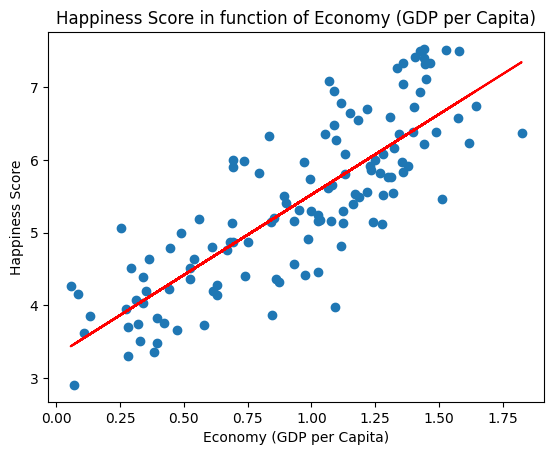

In [265]:
plt.pyplot.scatter(X_train, Y_train)
plt.pyplot.plot(X_train, Y_pred_train_manual,'r')   # fitted line

plt.pyplot.xlabel(independant_var)
plt.pyplot.ylabel(dependant_var)
plt.pyplot.title(dependant_var + " in function of " + independant_var)

<h2>Clustering</h2>

In [266]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Text(0.5, 1.0, 'Generosity in function of Economy (GDP per Capita)')

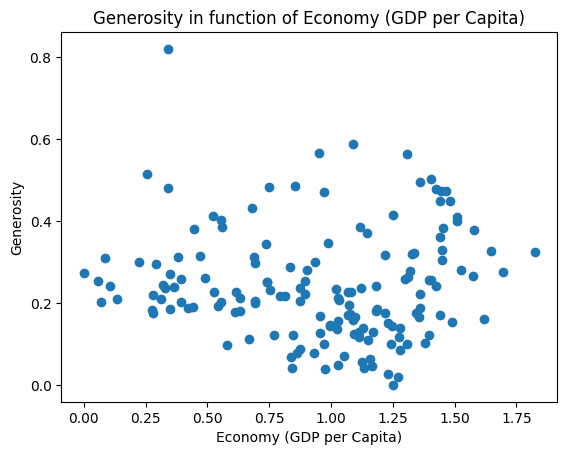

In [267]:
independant_var = "Economy (GDP per Capita)"
dependant_var = "Generosity"

plt.pyplot.scatter(D[independant_var], D[dependant_var])
plt.pyplot.xlabel(independant_var)
plt.pyplot.ylabel(dependant_var)
plt.pyplot.title(dependant_var + " in function of " + independant_var)

In [268]:
# Convert the dataframe into a 2D numpy array
X = D[[independant_var, dependant_var]].values

In [269]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[4 4 4 4 2 4 4 4 4 4 2 4 4 0 2 4 0 2 4 4 2 4 4 0 2 2 2 4 2 4 0 2 0 2 2 4 2
 0 0 0 4 2 2 2 2 0 0 3 3 2 0 0 2 2 3 2 2 2 0 2 2 2 2 0 0 0 0 2 2 0 2 2 0 2
 4 1 0 2 0 0 2 0 0 0 3 0 0 0 0 0 2 3 0 2 0 3 1 0 2 3 0 3 3 3 0 3 3 3 0 3 1
 0 0 3 1 0 0 3 1 0 0 3 0 3 1 0 0 1 2 3 1 1 3 2 1 1 2 1 3 3 0 1 1 1 1 1 3 1
 3 1 1 1 1 1 1 3 1]


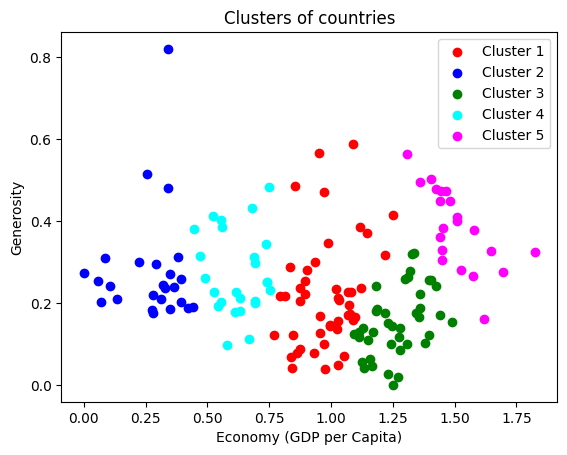

In [270]:
#same but custom for our dataset
plt.pyplot.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], c = 'red', label = 'Cluster 1')
plt.pyplot.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], c = 'blue', label = 'Cluster 2')
plt.pyplot.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], c = 'green', label = 'Cluster 3')
plt.pyplot.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], c = 'cyan', label = 'Cluster 4')
plt.pyplot.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], c = 'magenta', label = 'Cluster 5')
plt.pyplot.title('Clusters of countries')
plt.pyplot.xlabel(independant_var)
plt.pyplot.ylabel(dependant_var)
plt.pyplot.legend()
plt.pyplot.show()

Text(0.5, 1.0, 'Generosity in function of Economy (GDP per Capita)')

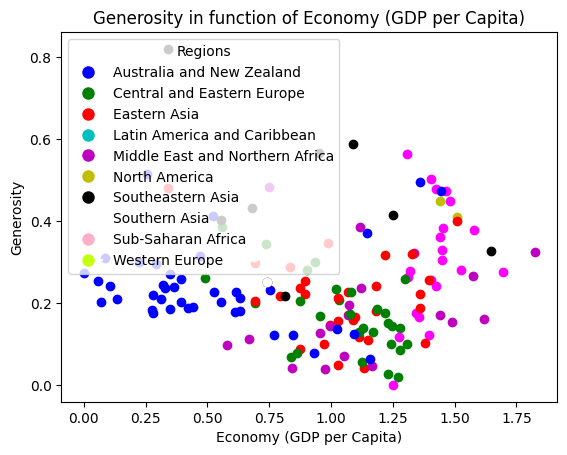

In [271]:
for i, region in enumerate(D["Region"]):
    if   region == "Australia and New Zealand": plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='b', marker='o')
    elif region == "Central and Eastern Europe": plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='green', marker='o')
    elif region == "Eastern Asia": plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='r', marker='o')
    elif region == "Latin America and Caribbean": plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='red', marker='o')
    elif region == "Middle East and Northern Africa": plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='m', marker='o')
    elif region == "North America": plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='y', marker='o')
    elif region == "Southeastern Asia": plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='k', marker='o')
    elif region == "Southern Asia": plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='w', marker='o')
    elif region == "Sub-Saharan Africa": plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='blue', marker='o')
    elif region == "Western Europe": plt.pyplot.scatter(D[independant_var][i], D[dependant_var][i], color='magenta', marker='o')

# Create a custom legend for the plot
colors = {
    "Australia and New Zealand": 'b',
    "Central and Eastern Europe": 'g',
    "Eastern Asia": 'r',
    "Latin America and Caribbean": 'c',
    "Middle East and Northern Africa": 'm',
    "North America": 'y',
    "Southeastern Asia": 'k',
    "Southern Asia": 'w',
    "Sub-Saharan Africa": '#ffaec8',
    "Western Europe": '#c4ff0e'
}
handles = [plt.pyplot.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=region) for region, color in colors.items()]
plt.pyplot.legend(handles=handles, title="Regions")

plt.pyplot.ylabel(dependant_var)
plt.pyplot.xlabel(independant_var)
plt.pyplot.title(dependant_var + " in function of " + independant_var)

</b><hr>

<h1>Step 7: Model Evaluation:</h1>

</b><hr>

<h1>Step 8: Model Refinement:</h1>